In [2]:
%run 'ks25_Read_epistasis.ipynb'

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



Reading precalculated epistasis...
/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/epistasis_in_foursomes/



Variables: 

- ep_dict: a dictionary, Keys are tuples (mutA, mutB) and values are pandas.Series of epistasis between mutA and mutB in all backgrounds. 
Tuples (mutA, mutB) are sorted by aa_position.

- get_ep_summary: function that takes ep_dict as an argument and applies an arbitrary function to every pd.Series object. For example, ep_summary = get_ep_summary(ep_dict, np.mean)

Important: natlib_filtering is currently True. This can be changed in the cell #2.



In [5]:
mutpairs_summary = pd.read_hdf(files_dump_folder + 'Summary_for_pairs_of_mutations.hdf', 'data')

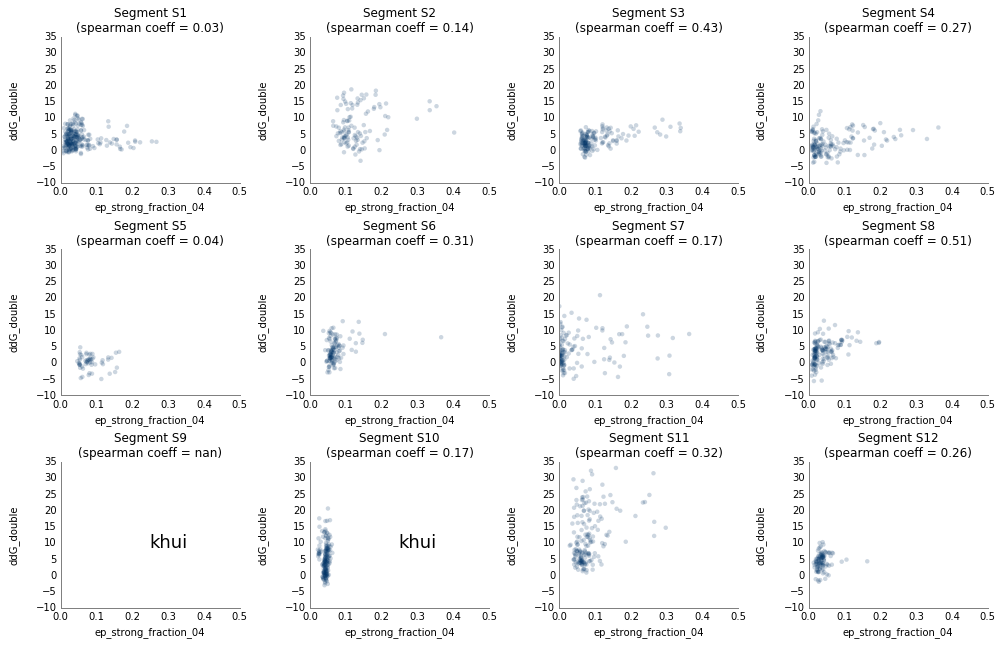

In [25]:
color_positive = '#E91348'
color_negative = '#003366'

x = u'ep_strong_fraction_04'
y = 'ddG_double'

plot_better(width=14, height=9)
title ='%s vs %s in double mutants' % (x,y)
for index, segment in enumerate(data.keys()):
    to_plot = mutpairs_summary[mutpairs_summary.segment == segment.split('_')[0]].dropna()
    ax = plt.subplot(3,4,index+1)
    improve_plot(ax, grid='')
    plt.scatter(to_plot[x],to_plot[y], edgecolor='none', alpha=0.2, color=color_negative)
    spearman = stats.spearmanr(to_plot[x],to_plot[y])
    if segment == 'S9_scaled' or segment == 'S10_scaled':
        plt.text(0.3, 10, u'khui', ha='center', va='center', fontsize=18)
    subtitle = 'Segment %s' %(segment.split('_')[0])
    subtitle += '\n(spearman coeff = %.2f)' %spearman[0]
    plt.title(subtitle)
    plt.ylim(-10, 35)
    plt.xlim(0, 0.5)
#     plt.axvline(0, color='gray')
    plt.xlabel(x)
    plt.ylabel(y[:14]+'\n'+y[14:])
plt.tight_layout()
# save_image(image_counter, title, figures_folder, notebook_prefix)